<a href="https://colab.research.google.com/github/EnayathShaik/AI_ML/blob/Practice/Churn_Modeling_Using_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df_churn = pd.read_csv("/content/Churn_Modelling.csv")
df_churn.shape

(10000, 14)

In [5]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
gender_counts = df_churn.Gender.value_counts()

In [24]:
gender_counts

,count
Gender,
Male,5457
Female,4543


In [30]:
gender_labels = gender_counts.keys()
gender_values = gender_counts.values

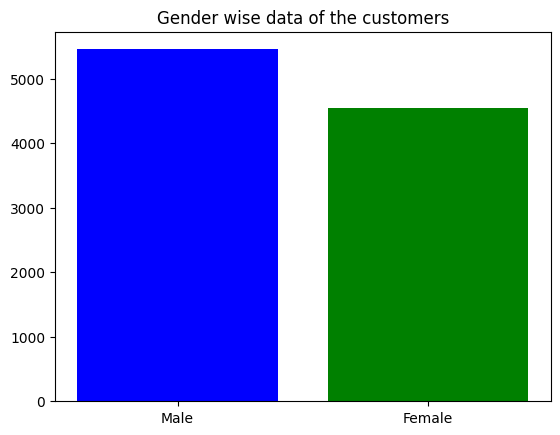

In [40]:
plt.bar(gender_labels, gender_values, color=['b', 'g'] )
plt.title("Gender wise data of the customers")
plt.show()

In [41]:
geography_counts = df_churn['Geography'].value_counts()
geography_counts

,count
Geography,
France,5014
Germany,2509
Spain,2477


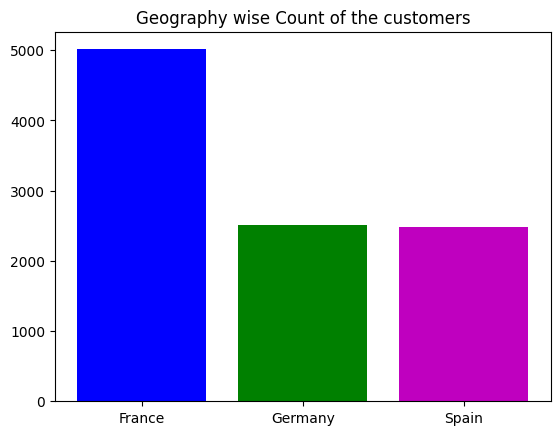

In [47]:
plt.bar(geography_counts.keys(), geography_counts.values, color=['b', 'g', 'm'] )
plt.title("Geography wise Count of the customers")
plt.show()

In [48]:
df_churn.CustomerId.nunique()

10000

In [49]:
df_churn.Surname.nunique()

2932

In [50]:
df_churn.RowNumber.nunique()

10000

In [51]:
df_churn.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace= True)

In [52]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [53]:
df_churn = pd.get_dummies(df_churn, columns=['Geography', 'Gender'], drop_first= True)
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [54]:
df_churn['Geography_Germany'] = np.where(df_churn['Geography_Germany'],1,0)
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,True,False


In [56]:
df_churn['Geography_Spain'] = np.where(df_churn['Geography_Spain'], 1, 0)
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,False


In [57]:
df_churn['Gender_Male'] = np.where(df_churn['Gender_Male'] == True, 1, 0)
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [58]:
x = df_churn.drop(['Exited'], axis = 1)
y = df_churn['Exited']

In [59]:
x.shape

(10000, 11)

In [60]:
y.shape

(10000,)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, stratify=y, random_state= 42)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [64]:
sc = StandardScaler()

In [68]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


In [70]:
x_train_sc

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [69]:
x_test_sc

array([[-0.68073539, -0.27993196,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [-1.30191518, -0.5649346 , -0.35097064, ...,  1.72916886,
        -0.57773517,  0.90750738],
       [-0.97061929,  0.10007155, -0.35097064, ..., -0.57831252,
         1.73089688, -1.10191942],
       ...,
       [-1.39509214,  0.7650777 ,  1.3751852 , ...,  1.72916886,
        -0.57773517, -1.10191942],
       [ 0.39597623,  0.00507067,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 1.02750901, -0.5649346 , -1.04143297, ..., -0.57831252,
        -0.57773517,  0.90750738]])

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [72]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [75]:
import keras_tuner as kt

In [76]:
from tensorflow.keras.layers import Dropout

In [83]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers', min_value = 1, max_value = 5)):
    if counter == 0:
      model.add(Dense(hp.Int('num_neurons_'+str(i), min_value = 4, max_value = 128, step = 4),
                      activation=hp.Choice('activation_'+str(i), values = ['relu', 'tanh', 'sigmoid']),
                      input_dim = 11))
      model.add(Dropout(hp.Choice('dropout_'+str(i),values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])))
    else:
      model.add(Dense(hp.Int('num_neurons_'+str(i), min_value = 4, max_value = 128, step = 4),
                      activation=hp.Choice('activation_'+str(i), values = ['relu', 'tanh', 'sigmoid'])))
      model.add(Dropout(hp.Choice('dropout_'+str(i),values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])))
    counter += 1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer = hp.Choice('optimizer_'+str(i), values = ['adam','rmsprop', 'sgd']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [84]:
tuner  = kt.RandomSearch(
    build_model,
    objective= 'val_accuracy',
    max_trials = 5,
    directory = 'logs',
    project_name = 'Hyperparameters'
)

In [85]:
tuner.search(x_train_sc, y_train, epochs= 5, validation_data = (x_test_sc, y_test))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.7975000143051147

Best val_accuracy So Far: 0.8220000267028809
Total elapsed time: 00h 00m 47s


In [87]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'num_neurons_0': 76,
 'activation_0': 'relu',
 'dropout_0': 0.15,
 'optimizer_0': 'rmsprop',
 'num_neurons_1': 4,
 'activation_1': 'relu',
 'dropout_1': 0.1,
 'num_neurons_2': 4,
 'activation_2': 'relu',
 'dropout_2': 0.1,
 'optimizer_2': 'adam'}

In [88]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [89]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 76)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 76)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,245 (4.86 KB)

 Trainable params: 1,245 (4.86 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
best_model.fit(x_train_sc, y_train, epochs = 20, initial_epoch=5, validation_data=(x_test_sc,y_test))

Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8225 - loss: 0.3930 - val_accuracy: 0.8220 - val_loss: 0.3626
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8170 - loss: 0.3800 - val_accuracy: 0.8230 - val_loss: 0.3636
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8229 - loss: 0.3785 - val_accuracy: 0.8220 - val_loss: 0.3626
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8179 - loss: 0.3838 - val_accuracy: 0.8220 - val_loss: 0.3592
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.3662 - val_accuracy: 0.8215 - val_loss: 0.3636
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8180 - loss: 0.3773 - val_accuracy: 0.8225 - val_loss: 0.3603
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8095 - loss: 0.3843 - val_accuracy: 0.8225 - val_loss: 0.3583
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.3908 - val_accuracy

In [91]:
y_pred = best_model.predict(x_test_sc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
